# OpenAI Gym (DQN_test)
https://medium.freecodecamp.org/an-introduction-to-deep-q-learning-lets-play-doom-54d02d8017d8

## Setup

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import skimage
import retro
import sys
import tensorflow as tf

from animations import *
from dqn import DQN
from params import *
from preprocessing import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

print(f'sys.version: {sys.version}')
print(f'skimage.version: {skimage.__version__}')
print(f'tf.version: {tf.__version__}')
print(f'retro.version: {retro.__version__}')

sys.version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
skimage.version: 0.14.1
tf.version: 1.11.0
retro.version: 0.6.1.dev25+g9ec2e44


## Look at the SpaceInvaders-Atari2600 env
Steps to follow:
1. Download zip file from http://www.atarimania.com/rom_collection_archive_atari_2600_roms.html
2. Open Roms.rar > ROMS.rar and find Space Invaders (1980) XXXXXX
3. Extract all matches (there are 5 of them) into your destin folder
4. python -m retro.import . (don't forget the point)

In [2]:
env = retro.make('SpaceInvaders-Atari2600')
env.reset()
env.render()
print(f'action_size: {env.action_space.n}')

action_size: 8


### Instantiate DQN

In [3]:
tf.reset_default_graph()

dqn = DQN(state_shape=STATE_SHAPE, action_size=ACTION_SIZE, dqn_name='DQN')

### Test and watch how the agent plays SpaceInvaders-Atari2600

In [4]:
def test(dqn, env, episode=NUM_EPISODES):
    frames = []
    with tf.Session() as sess:
        # load the model
        tf.train.Saver().restore(sess, SAVE_PATH + f'/model_episode_{episode}.ckpt')
        
        step = 0
        total_reward = 0
        done = False
        stacked_frames = []
        
        state = env.reset()
        frames.append(state)
        state, stacked_frames = stack_frames(stacked_frames, state, 
                                             is_new_episode=True)
        env.render()
        
        while not done:
            state = state.reshape([1, *STATE_SHAPE])
            Q = sess.run(dqn.output,
                         feed_dict={
                             dqn.input_ph: state
                         })
            action_idx = np.argmax(Q)
            action = POSSIBLE_ACTIONS[action_idx]
            
            next_state, reward, done, _ = env.step(action)
            frames.append(next_state.copy())
            next_state, stacked_frames = stack_frames(stacked_frames, next_state,
                                                      is_new_episode=False)
            state = next_state
            env.render()
            
            step += 1
            total_reward += reward
        
        print(f'Steps: {step}, total_reward: {total_reward}')
    return episode, total_reward, frames

In [5]:
episode, reward, frames = test(dqn, env)
frames = np.array(frames)

INFO:tensorflow:Restoring parameters from ./checkpoints/model_episode_3.ckpt
Steps: 3474, total_reward: 380.0


CPU times: user 4.43 s, sys: 244 ms, total: 4.67 s
Wall time: 32.3 s


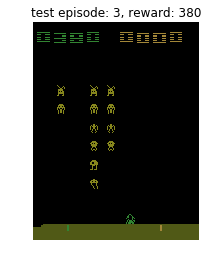

In [6]:
%%time
save_ani(episode, int(reward), frames, out_path='./results/', mode='test')

In [7]:
#env.close()